In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from datetime import datetime
import scipy.stats

In [2]:
# Input date range of interest
begin_target_date = datetime(2024, 7, 1, 0, 0) # (year, month, day, 24hr, min)
end_target_date = datetime(2024, 7, 31, 0, 0) # (year, month, day, 24hr, min)

# Define J2000 epoch (January 1, 2000 at 12:00 UTC)
j2000_epoch = datetime(2000, 1, 1, 0, 0)

# Compute fractional days since J2000
begin_delta_days = (begin_target_date - j2000_epoch).total_seconds() / 86400
end_delta_days = (end_target_date - j2000_epoch).total_seconds() / 86400

delta_days = [begin_delta_days, end_delta_days]

print(delta_days) 

[8948.0, 8978.0]


# NO2

In [12]:
#Replace with your filepath
HU_NO2h_filepath = "../HULL/Data/Pandora156s1_HU_L2_12.27_NO2h.txt"
CBBT_NO2h_filepath = "../HULL/Data/Pandora255s1_VirginiaBeachVA-CBBT_L2_NO2h.txt"
LaRC_NO2h_filepath = "../HULL/Data/Pandora37s1_HamptonVA_L2_NO2h.txt"

#Column names based on txt files ending in rnvh3p1
col_names_NO2h = ["DateTime", "Time Since 2000", "Duration of Measurement", "Solar Zenith", "Solar Azimuth", "Lunar Zenith", "Lunar Azimuth", "Pointing Zenith", "Pointing Azimuth", "rms", 
            "Normalized rms", "Expected rms", "Expected Normalized rms", "Climatological Station Pressure", "Climatological station temperature", "Climatological effective O2 height", "Climatological effective O2O2 height", "Climatological surface O2 concentration", "Climatological surface O2O2 concentration", "Climatological total O2 column",
            "Climatological total O2O2 column", "Data processing type", "Calibration file version", "Calibration file validity", "Mean value of measured data", "Wavelength effective temperature", "Estimated average residual stray light level", "Retrieved wavelength shift", "Retrieved total wavelength shift", "Retrieved resolution change",
            "Integration time", "bright count cycles", "position of filterwheel #1", "position of filterwheel #2", "Atmospheric variability", "L1 data quality flag", "Sum over 2^i using those i L1 exceeds the DQ1 limit", "Sum over 2^i using those i L1 exceeds the DQ2 limit", "L2Fit data quality flag", "Sum over 2^i using those i L2 exceeds the DQ1 limit", 
            "Sum over 2^i using those i L2 exceeds the DQ2 limit", "quality flag for water vapor", "L2 data quality parameter for water vapor exceeds the DQ1 limit", "L2 data quality parameter for water vapor exceeds the DQ2 limit", "Water vapor surface concentration", "uncertainty of water vapor surface concentration", "Water vapor surface concentration index", "Water vapor heterogeneity flag", "Water vapor tropospheric vertical column amount", "ncertainty of water vapor tropospheric vertical column",
            "Maximum horizontal distance for water vapor trop col", "Maximum vert distance for water vapor trop col", "quality flag for nitrogen dioxide", "L2 data quality parameter for nitrogen dioxide exceeds the DQ1 limit", "L2 data quality parameter for nitrogen dioxide exceeds the DQ2 limit", "Nitrogen dioxide surface concentration", "uncertainty of nitrogen dioxide surface concentration", "Nitrogen dioxide surface concentration index", "Nitrogen dioxide heterogeneity flag", "Climatological nitrogen dioxide stratospheric column amount",
            "Uncertainty of climatological nitrogen dioxide", "Nitrogen dioxide tropospheric vertical column amount", "uncertainty of nitrogen dioxide tropospheric", "Maximum horizontal distance for nitrogen dioxide tropospheric column", "Maximum vertical distance for nitrogen dioxide tropospheric column", "Top height of water vapor layer 1", "Partial water vapor vertical column amount layer 1", "Top height of nitrogen dioxide layer 1", "Partial nitrogen dioxide vertical column amount layer 1", "Top height of water vapor layer 2",
            "Partial water vapor vertical column amount layer 2", "Top height of nitrogen dioxide layer 2", "Partial nitrogen dioxide vertical column amount layer 2", "Top height of water vapor layer 3", "Partial water vapor vertical column amount layer 3", "Top height of nitrogen dioxide layer 3", "Partial nitrogen dioxide vertical column amount layer 3", "Top height of water vapor layer 4", "Partial water vapor vertical column amount layer 4", "Top height of nitrogen dioxide layer 4", "Partial nitrogen dioxide vertical column amount layer 4",
            "Top height of water vapor layer 5", "Partial water vapor vertical column amount layer 5", "Top height of nitrogen dioxide layer 5", "Partial nitrogen dioxide vertical column amount layer 5", "Top height of water vapor layer 6", "Partial water vapor vertical column amount layer 6", "Top height of nitrogen dioxide layer 6", "Partial nitrogen dioxide vertical column amount layer 6",
            "Top height of water vapor layer 7", "Partial water vapor vertical column amount layer 7", "Top height of nitrogen dioxide layer 7", "Partial nitrogen dioxide vertical column amount layer 7", "Top height of water vapor layer 8", "Partial water vapor vertical column amount layer 8", "Top height of nitrogen dioxide layer 8", "Partial nitrogen dioxide vertical column amount layer 8",
            "Top height of water vapor layer 9", "Partial water vapor vertical column amount layer 9", "Top height of nitrogen dioxide layer 9", "Partial nitrogen dioxide vertical column amount layer 9", "Top height of water vapor layer 10", "Partial water vapor vertical column amount layer 10", "Top height of nitrogen dioxide layer 10", "Partial nitrogen dioxide vertical column amount layer 10",
            "Top height of water vapor layer 11", "Partial water vapor vertical column amount layer 11", "Top height of nitrogen dioxide layer 11", "Partial nitrogen dioxide vertical column amount layer 11", "Top height of water vapor layer 12", "Partial water vapor vertical column amount layer 12", "Top height of nitrogen dioxide layer 12", "Partial nitrogen dioxide vertical column amount layer 12",
            "Top height of water vapor layer 13", "Partial water vapor vertical column amount layer 13", "Top height of nitrogen dioxide layer 13", "Partial nitrogen dioxide vertical column amount layer 13"]

HU_NO2h_df=pd.read_csv(HU_NO2h_filepath, sep = " ",encoding='latin',on_bad_lines='warn', skiprows=93, names=col_names_NO2h) # Data for HU site
CBBT_NO2h_df=pd.read_csv(CBBT_NO2h_filepath, sep = " ",encoding='latin',on_bad_lines='warn', skiprows=93, names=col_names_NO2h) # Data for CBBT
LaRC_NO2h_df = pd.read_csv(LaRC_NO2h_filepath, sep = " ",encoding='latin',on_bad_lines='warn', skiprows=93, names=col_names_NO2h) # Langley

In [13]:
# Makes df for just dates of interest
HU_df_doi = HU_NO2h_df[(HU_NO2h_df.iloc[:, col_names_NO2h.index("Time Since 2000")].values > delta_days[0])&(HU_NO2h_df.iloc[:, col_names_NO2h.index("Time Since 2000")].values < delta_days[1])]
CBBT_df_doi = CBBT_NO2h_df[(CBBT_NO2h_df.iloc[:, col_names_NO2h.index("Time Since 2000")].values > delta_days[0])&(CBBT_NO2h_df.iloc[:, col_names_NO2h.index("Time Since 2000")].values < delta_days[1])]
LaRC_df_doi = LaRC_NO2h_df[(LaRC_NO2h_df.iloc[:, col_names_NO2h.index("Time Since 2000")].values > delta_days[0])&(LaRC_NO2h_df.iloc[:, col_names_NO2h.index("Time Since 2000")].values < delta_days[1])]

# Sanity check to make sure there is data
print(len(HU_df_doi))
print(len(CBBT_df_doi))
print(len(LaRC_df_doi))

1032
1945
899


## Time Series Comparison

In [14]:
NO2_amount_columns = [68,72,76,80,84,88,92,96,100,104,108,112,116] # will change with different datasets
NO2_height_columns = [67,71,75,79,83,87,91,95,99,103,107,111,115]# will change with different datasets

# Select what we want
HU_amount = HU_df_doi.iloc[:, NO2_amount_columns].values
HU_height = HU_df_doi.iloc[:, NO2_height_columns].values
HU_time = HU_df_doi.iloc[:, [col_names_NO2h.index("Time Since 2000")]].values

LaRC_amount = LaRC_df_doi.iloc[:, NO2_amount_columns].values
LaRC_height = LaRC_df_doi.iloc[:, NO2_height_columns].values
LaRC_time = LaRC_df_doi.iloc[:, [col_names_NO2h.index("Time Since 2000")]].values

CBBT_amount = CBBT_df_doi.iloc[:, NO2_amount_columns].values
CBBT_height = CBBT_df_doi.iloc[:, NO2_height_columns].values
CBBT_time = CBBT_df_doi.iloc[:, [col_names_NO2h.index("Time Since 2000")]].values

# Log doesn't like zeros
HU_amount[HU_amount <= 0] = np.nan
CBBT_amount[CBBT_amount <= 0] = np.nan
LaRC_amount[LaRC_amount <= 0] = np.nan

# Reshape time variable
HU_time_fix = np.tile(HU_time, (1, len(NO2_amount_columns)))
CBBT_time_fix = np.tile(CBBT_time, (1, len(NO2_amount_columns)))
LaRC_time_fix = np.tile(LaRC_time, (1, len(NO2_amount_columns)))

# Define bin edges
numDays =  np.linspace(int(delta_days[0]), int(delta_days[1]), int((delta_days[1]-delta_days[0])+1)) #sets bins from 00:00 UTC first day to 23:59 UTC last day, with 24 hr increments
heights = np.linspace(0,3.5, 15) #sets bin heights every .25km from 0 to 3.5 km

# Compute 2D bin means
HU_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    HU_time_fix.flatten(), HU_height.flatten(), HU_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights]) #lambda a: np.nanmean(a) if a.size else np.nan

CBBT_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    CBBT_time_fix.flatten(), CBBT_height.flatten(), CBBT_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

LaRC_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    LaRC_time_fix.flatten(), LaRC_height.flatten(), LaRC_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

# Calculate min.max values for plotting
HU_vmin = np.nanmin(HU_statistic[HU_statistic > 0])
HU_vmax = np.nanmax(HU_statistic)
CBBT_vmin = np.nanmin(CBBT_statistic[CBBT_statistic > 0])
CBBT_vmax = np.nanmax(CBBT_statistic)
LaRC_vmin = np.nanmin(LaRC_statistic[LaRC_statistic > 0])
LaRC_vmax = np.nanmax(LaRC_statistic)

vmin = np.nanmin([HU_vmin, CBBT_vmin, LaRC_vmin])
vmax = np.nanmax([HU_vmax, CBBT_vmax, LaRC_vmax])

/tmp/ipykernel_165111/1536618721.py:33: RuntimeWarning: Mean of empty slice
  HU_time_fix.flatten(), HU_height.flatten(), HU_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights]) #lambda a: np.nanmean(a) if a.size else np.nan
/tmp/ipykernel_165111/1536618721.py:36: RuntimeWarning: Mean of empty slice
  CBBT_time_fix.flatten(), CBBT_height.flatten(), CBBT_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])
/tmp/ipykernel_165111/1536618721.py:39: RuntimeWarning: Mean of empty slice
  LaRC_time_fix.flatten(), LaRC_height.flatten(), LaRC_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])


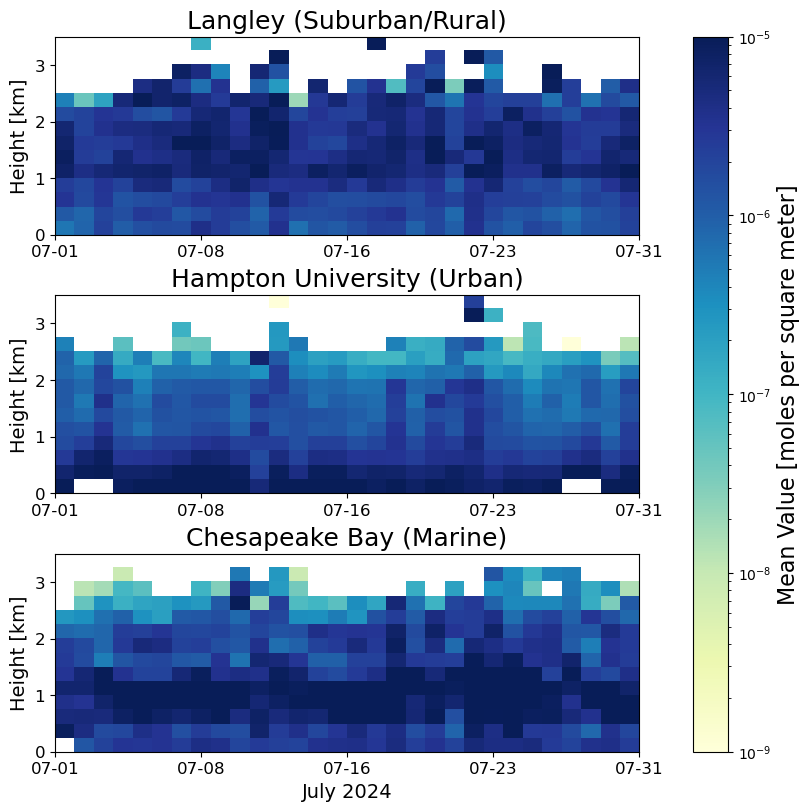

In [18]:
# Optional settings for data
vmin = 10**-9
vmax = 10**-5
color = 'YlGnBu'

fig, axs = plt.subplots(3,1, figsize=(8,8), constrained_layout=True) #stacked subplots(3,1); horizontal subplots(1,3)
axs[0].imshow(LaRC_statistic.T, aspect='auto', cmap=color, #transform is used to feed imshow the correct orientation
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]], #x egde gets overwritten from above, but all have the same edges from out defined bins
              origin='lower', norm=mcolors.LogNorm(vmin=vmin, vmax=vmax)) #origin lower tells it to start from the bottom of the plot
axs[1].imshow(HU_statistic.T, aspect='auto', cmap=color, # aspect = auto tells it how to size the subplot (prevents it from being too small)
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
              origin='lower', norm=mcolors.LogNorm(vmin=vmin, vmax=vmax)) #Log is used to better see trends in trace gas data. All data must be positive
c = axs[2].imshow(CBBT_statistic.T, aspect='auto', cmap=color,
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
              origin='lower', norm=mcolors.LogNorm(vmin=vmin, vmax=vmax)) #setting this as a variable so colorbar knows what to refer to when creating the scale


#fig.suptitle("NO2 Concentration                 ")
axs[0].set_title("Langley (Suburban/Rural)", size = 18)
axs[1].set_title("Hampton University (Urban)", size = 18)
axs[2].set_title("Chesapeake Bay (Marine)", size = 18)

#axs[0].set_xlabel("July 2024") #kept in for horizontal subplots
#axs[1].set_xlabel("July 2024") #kept in for horizontal subplots
axs[2].set_xlabel("July 2024", size = 14)
axs[0].set_ylabel("Height [km]", size = 14)
axs[1].set_ylabel("Height [km]", size = 14)
axs[2].set_ylabel("Height [km]", size = 14)

cbar = fig.colorbar(c, ax = axs) # refers back to imshow lines
cbar.set_label("Mean Value [moles per square meter]", fontsize=16)

axs[0].set_yticks([0.0,1.0,2.0,3.0])
axs[0].tick_params(axis='y', labelsize=12)
axs[1].set_yticks([0,1,2,3])
axs[1].tick_params(axis='y', labelsize=12)
axs[2].set_yticks([0,1,2,3])
axs[2].tick_params(axis='y', labelsize=12)


axs[0].set_xticks(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5)) # creates 5 equally spaced ticks
axs[0].set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'), size = 12) # labels those ticks in a datetime we can understand
axs[1].set_xticks(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5))
axs[1].set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'), size = 12)
axs[2].set_xticks(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5))
axs[2].set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'), size = 12)

#plt.show()
#line to save figure. Must comment out plt.show() if above the savefig line or else fig won't save right
plt.savefig('Plots/NO2_Stacked_Profile_July2024.jpg', dpi=300, bbox_inches='tight') 


## Difference Plot

In [9]:
NO2_amount_columns = [68,72,76,80,84,88,92,96,100,104,108,112,116] # will change with different datasets
height_columns = [67,71,75,79,83,87,91,95,99,103,107,111,115]# will change with different datasets

df = [LaRC_df_doi, HU_df_doi, CBBT_df_doi]
# 1 = Langley
# 2 = HU
# 3 = CBBT
# Input one of these numbers in the next 6 lines of non-commented code to assign which is pos and which is neg

# Will be positive if more prevalent
pos_amount = df[0].iloc[:, NO2_amount_columns].values
pos_height = df[0].iloc[:, height_columns].values
pos_time = df[0].iloc[:, [col_names_NO2h.index("Time Since 2000")]].values

#will be negative if more prevalent
neg_amount = df[1].iloc[:, NO2_amount_columns].values
neg_height = df[1].iloc[:, height_columns].values
neg_time = df[1].iloc[:, [col_names_NO2h.index("Time Since 2000")]].values

#log doesn't like zeros
pos_amount[pos_amount <= 0] = np.nan
neg_amount[neg_amount <= 0] = np.nan

# Reshape time variable
pos_time_fix = np.tile(pos_time, (1, 13))
neg_time_fix = np.tile(neg_time, (1, 13))

# Define your bin edges
numDays =  np.linspace(int(delta_days[0]), int(delta_days[1]), int((delta_days[1]-delta_days[0])+1))
heights = np.linspace(0,3.5, 13)

# Compute 2D bin means
pos_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    pos_time_fix.flatten(), pos_height.flatten(), pos_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

neg_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    neg_time_fix.flatten(), neg_height.flatten(), neg_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

# Flip the result vertically to match imshow orientation (optional)
pos_vmin = np.nanmin(pos_statistic[pos_statistic > 0])
pos_vmax = np.nanmax(pos_statistic)
neg_vmin = np.nanmin(neg_statistic[neg_statistic > 0])
neg_vmax = np.nanmax(neg_statistic)
vmin = np.nanmin([pos_vmin, neg_vmin])
vmax = np.nanmax([pos_vmax, neg_vmax])

/tmp/ipykernel_7022/956518924.py:34: RuntimeWarning: Mean of empty slice
  pos_time_fix.flatten(), pos_height.flatten(), pos_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])
/tmp/ipykernel_7022/956518924.py:37: RuntimeWarning: Mean of empty slice
  neg_time_fix.flatten(), neg_height.flatten(), neg_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])


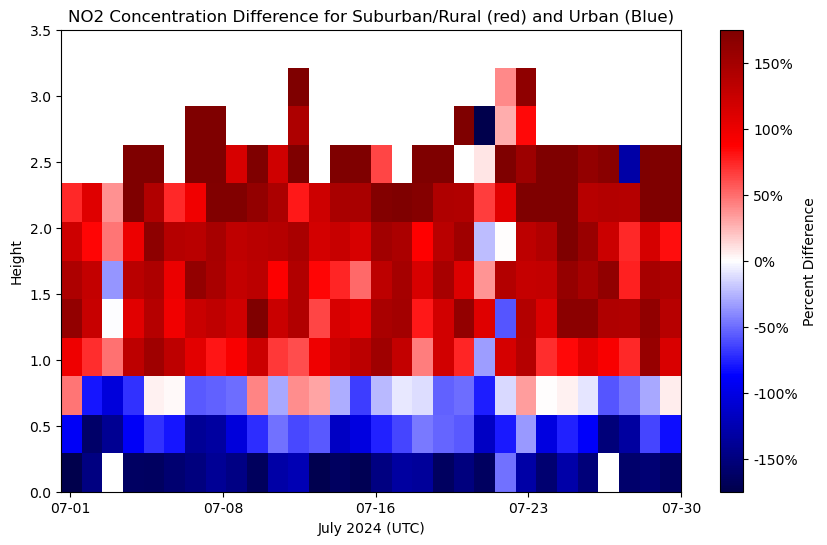

In [10]:
with np.errstate(divide='ignore', invalid='ignore'):
    percent_diff = (pos_statistic - neg_statistic) / ((pos_statistic + neg_statistic) / 2) * 100
    percent_diff[np.isnan(percent_diff)] = np.nan  # Optionally handle NaNs as zeros or 

# Creates Figure and plot
fig, ax = plt.subplots(figsize=(10, 6))

edge = 175 #% value you want to be min and max
c = ax.imshow((percent_diff).T, aspect='auto', cmap='seismic',
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
              origin='lower', vmin = -1*edge, vmax = edge)

# Sets words on plot
ax.set_title("NO2 Concentration Difference for Suburban/Rural (red) and Urban (Blue)")
ax.set_xlabel("July 2024 (UTC)")
ax.set_ylabel("Height")

# Color bar settings
cbar = fig.colorbar(c, label="Percent Difference")
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}%')) # adds % sign

# Make ticks readable to Humans
ax.set_xticks(np.linspace(np.nanmin(pos_time), np.nanmax(pos_time), 5))
ax.set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(pos_time), np.nanmax(pos_time), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'))


plt.show()
#line to save figure. Must comment out plt.show() if above the savefig line or else fig won't save right
#plt.savefig('Plots/NO2_Diff_Profile_July2024_LaRC_HU.jpg', dpi=300, bbox_inches='tight')

# HCHO

In [19]:
#Replace with your filepath
HU_HCHOh_filepath = "../HULL/Data/Pandora156s1_HU_L2_HCHOh.txt"
CBBT_HCHOh_filepath = "../HULL/Data/Pandora255s1_VirginiaBeachVA-CBBT_L2_HCHOh.txt"
LaRC_HCHOh_filepath = "../HULL/Data/Pandora37s1_HamptonVA_L2_HCHOh.txt"

#Column names based on txt files ending in rfuh5p1
col_names_HCHOh = ["DateTime", "Time Since 2000", "Duration of Measurement", "Solar Zenith", "Solar Azimuth", "Lunar Zenith", "Lunar Azimuth", "Pointing Zenith", "Pointing Azimuth", "rms", 
            "Normalized rms", "Expected rms", "Expected Normalized rms", "Climatological Station Pressure", "Climatological station temperature", "Climatological effective O2 height", "Climatological effective O2O2 height", "Climatological surface O2 concentration", "Climatological surface O2O2 concentration", "Climatological total O2 column",
            "Climatological total O2O2 column", "Data processing type", "Calibration file version", "Calibration file validity", "Mean value of measured data", "Wavelength effective temperature", "Estimated average residual stray light level", "Retrieved wavelength shift for L1", "Retrieved total wavelength shift", "Retrieved resolution change",
            "Integration time", "bright count cycles", "position of filterwheel #1", "position of filterwheel #2", "Atmospheric variability", "L1 data quality flag", "Sum over 2^i using those i L1 exceeds the DQ1 limit", "Sum over 2^i using those i L1 exceeds the DQ2 limit", "L2Fit data quality flag", "Sum over 2^i using those i L2Fit exceeds the DQ1 limit", 
            "Sum over 2^i using those i L2Fit exceeds the DQ2 limit", "L2 data quality flag", "Sum over 2^i using those i L2 exceeds the DQ1 limit", "Sum over 2^i using those i L2 exceeds the DQ2 limit", "HCHO surface concentration", "independent uncertainty of HCHO surface concentration", "HCHO surface concentration index", "HCHO heterogeneity flag", "HCHO tropospheric vertical column amount", "Independent uncertainty of HCHO tropospheric vertical column",
            "Maximum horizontal distance for HCHO trop col", "Maximum vert distance for HCHO trop col", "Top height of HCHO layer 1", "Partial HCHO vertical column amount layer 1", "Top height of HCHO layer 2", "Partial HCHO vertical column amount layer 2", "Top height of HCHO layer 3", "Partial HCHO vertical column amount layer 3", "Top height of HCHO layer 4", "Partial HCHO vertical column amount layer 4",
            "Top height of HCHO layer 5", "Partial HCHO vertical column amount layer 5", "Top height of HCHO layer 6", "Partial HCHO vertical column amount layer 6", "Top height of HCHO layer 7", "Partial HCHO vertical column amount layer 7", "Top height of HCHO layer 8", "Partial HCHO vertical column amount layer 8", "Top height of HCHO layer 9", "Partial HCHO vertical column amount layer 9",
            "Top height of HCHO layer 10", "Partial HCHO vertical column amount layer 10", "Top height of HCHO layer 11", "Partial HCHO vertical column amount layer 11", "Top height of HCHO layer 12", "Partial HCHO vertical column amount layer 12", "Top height of HCHO layer 13", "Partial HCHO vertical column amount layer 13"]

HU_HCHOh_df=pd.read_csv(HU_HCHOh_filepath, sep = " ",encoding='latin',on_bad_lines='warn', skiprows=78, names=col_names_HCHOh) # Data for HU site
CBBT_HCHOh_df=pd.read_csv(CBBT_HCHOh_filepath, sep = " ",encoding='latin',on_bad_lines='warn', skiprows=78, names=col_names_HCHOh) # Data for CBBT
LaRC_HCHOh_df = pd.read_csv(LaRC_HCHOh_filepath, sep = " ",encoding='latin',on_bad_lines='warn', skiprows=78, names=col_names_HCHOh) # Langley

In [20]:
# Makes df for just dates of interest
HU_df_doi = HU_HCHOh_df[(HU_HCHOh_df.iloc[:, col_names_HCHOh.index("Time Since 2000")].values > delta_days[0])&(HU_HCHOh_df.iloc[:, col_names_HCHOh.index("Time Since 2000")].values < delta_days[1])]
CBBT_df_doi = CBBT_HCHOh_df[(CBBT_HCHOh_df.iloc[:, col_names_HCHOh.index("Time Since 2000")].values > delta_days[0])&(CBBT_HCHOh_df.iloc[:, col_names_HCHOh.index("Time Since 2000")].values < delta_days[1])]
LaRC_df_doi = LaRC_HCHOh_df[(LaRC_HCHOh_df.iloc[:, col_names_HCHOh.index("Time Since 2000")].values > delta_days[0])&(LaRC_HCHOh_df.iloc[:, col_names_HCHOh.index("Time Since 2000")].values < delta_days[1])]

# Sanity check to make sure there is data
print(len(HU_df_doi))
print(len(CBBT_df_doi))
print(len(LaRC_df_doi))

1949
3798
1687


## Time Series Comparison

In [21]:
HCHO_height_columns = [52,54,56,58,60,62,64,66,68,70,72,74,76] # will change with different datasets
HCHO_amount_columns = [53,55,57,59,61,63,65,67,69,71,73,75,77]# will change with different datasets

# Select what we want
HU_amount = HU_df_doi.iloc[:, HCHO_amount_columns].values
HU_height = HU_df_doi.iloc[:, HCHO_height_columns].values
HU_time = HU_df_doi.iloc[:, [col_names_HCHOh.index("Time Since 2000")]].values

LaRC_amount = LaRC_df_doi.iloc[:, HCHO_amount_columns].values
LaRC_height = LaRC_df_doi.iloc[:, HCHO_height_columns].values
LaRC_time = LaRC_df_doi.iloc[:, [col_names_HCHOh.index("Time Since 2000")]].values

CBBT_amount = CBBT_df_doi.iloc[:, HCHO_amount_columns].values
CBBT_height = CBBT_df_doi.iloc[:, HCHO_height_columns].values
CBBT_time = CBBT_df_doi.iloc[:, [col_names_HCHOh.index("Time Since 2000")]].values

# Log doesn't like zeros
HU_amount[HU_amount <= 0] = np.nan
CBBT_amount[CBBT_amount <= 0] = np.nan
LaRC_amount[LaRC_amount <= 0] = np.nan

# Reshape time variable
HU_time_fix = np.tile(HU_time, (1, len(HCHO_amount_columns)))
CBBT_time_fix = np.tile(CBBT_time, (1, len(HCHO_amount_columns)))
LaRC_time_fix = np.tile(LaRC_time, (1, len(HCHO_amount_columns)))

# Define bin edges
numDays =  np.linspace(int(delta_days[0]), int(delta_days[1]), int((delta_days[1]-delta_days[0])+1)) #sets bins from 00:00 UTC first day to 23:59 UTC last day, with 24 hr increments
heights = np.linspace(0,3.5, 15) #sets bin heights every .25km from 0 to 3.5 km

# Compute 2D bin means
HU_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    HU_time_fix.flatten(), HU_height.flatten(), HU_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights]) #lambda a: np.nanmean(a) if a.size else np.nan

CBBT_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    CBBT_time_fix.flatten(), CBBT_height.flatten(), CBBT_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

LaRC_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    LaRC_time_fix.flatten(), LaRC_height.flatten(), LaRC_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

# Calculate min.max values for plotting
HU_vmin = np.nanmin(HU_statistic[HU_statistic > 0])
HU_vmax = np.nanmax(HU_statistic)
CBBT_vmin = np.nanmin(CBBT_statistic[CBBT_statistic > 0])
CBBT_vmax = np.nanmax(CBBT_statistic)
LaRC_vmin = np.nanmin(LaRC_statistic[LaRC_statistic > 0])
LaRC_vmax = np.nanmax(LaRC_statistic)

vmin = np.nanmin([HU_vmin, CBBT_vmin, LaRC_vmin])
vmax = np.nanmax([HU_vmax, CBBT_vmax, LaRC_vmax])

/tmp/ipykernel_165111/1286803290.py:33: RuntimeWarning: Mean of empty slice
  HU_time_fix.flatten(), HU_height.flatten(), HU_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights]) #lambda a: np.nanmean(a) if a.size else np.nan
/tmp/ipykernel_165111/1286803290.py:36: RuntimeWarning: Mean of empty slice
  CBBT_time_fix.flatten(), CBBT_height.flatten(), CBBT_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])
/tmp/ipykernel_165111/1286803290.py:39: RuntimeWarning: Mean of empty slice
  LaRC_time_fix.flatten(), LaRC_height.flatten(), LaRC_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])


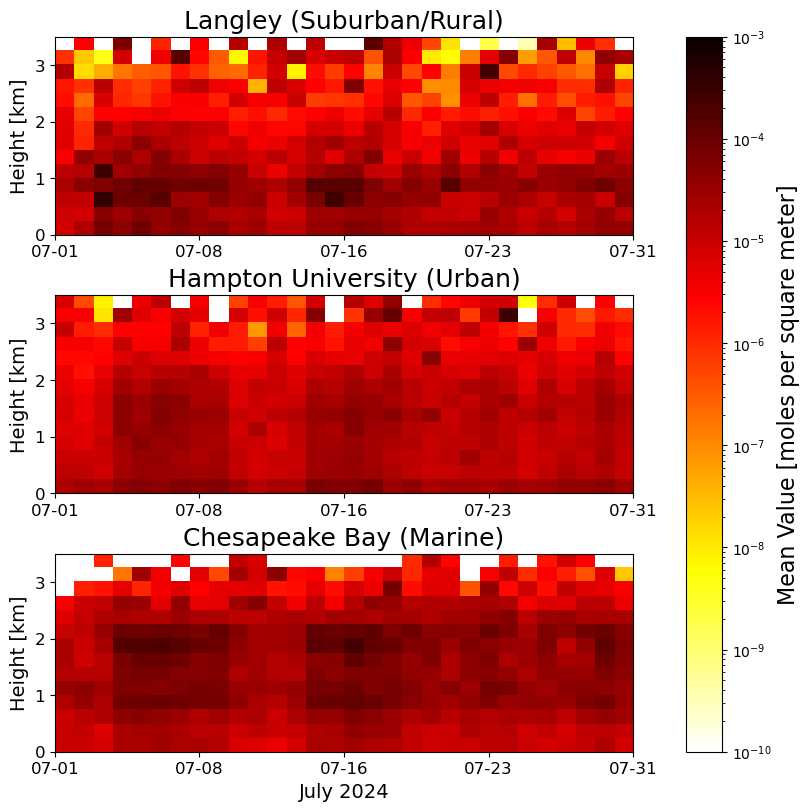

In [23]:
# Optional settings for data
vmin = 10**-10
vmax = 10**-3
color = 'hot_r'

fig, axs = plt.subplots(3,1, figsize=(8,8), constrained_layout=True) #stacked subplots(3,1); horizontal subplots(1,3)
axs[0].imshow(LaRC_statistic.T, aspect='auto', cmap=color, #transform is used to feed imshow the correct orientation
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]], #x egde gets overwritten from above, but all have the same edges from out defined bins
              origin='lower', norm=mcolors.LogNorm(vmin=vmin, vmax=vmax)) #origin lower tells it to start from the bottom of the plot
axs[1].imshow(HU_statistic.T, aspect='auto', cmap=color, # aspect = auto tells it how to size the subplot (prevents it from being too small)
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
              origin='lower', norm=mcolors.LogNorm(vmin=vmin, vmax=vmax)) #Log is used to better see trends in trace gas data. All data must be positive
c = axs[2].imshow(CBBT_statistic.T, aspect='auto', cmap=color,
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
              origin='lower', norm=mcolors.LogNorm(vmin=vmin, vmax=vmax)) #setting this as a variable so colorbar knows what to refer to when creating the scale


#fig.suptitle("HCHO Concentration                 ")
axs[0].set_title("Langley (Suburban/Rural)", size = 18)
axs[1].set_title("Hampton University (Urban)", size = 18)
axs[2].set_title("Chesapeake Bay (Marine)", size = 18)

#axs[0].set_xlabel("July 2024") #kept in for horizontal subplots
#axs[1].set_xlabel("July 2024") #kept in for horizontal subplots
axs[2].set_xlabel("July 2024", size = 14)
axs[0].set_ylabel("Height [km]", size = 14)
axs[1].set_ylabel("Height [km]", size = 14)
axs[2].set_ylabel("Height [km]", size = 14)

cbar = fig.colorbar(c, ax = axs) # refers back to imshow lines
cbar.set_label("Mean Value [moles per square meter]", fontsize=16)

axs[0].set_yticks([0.0,1.0,2.0,3.0])
axs[0].tick_params(axis='y', labelsize=12)
axs[1].set_yticks([0,1,2,3])
axs[1].tick_params(axis='y', labelsize=12)
axs[2].set_yticks([0,1,2,3])
axs[2].tick_params(axis='y', labelsize=12)

axs[0].set_xticks(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5)) # creates 5 equally spaced ticks
axs[0].set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'), size = 12) # labels those ticks in a datetime we can understand
axs[1].set_xticks(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5))
axs[1].set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'), size = 12)
axs[2].set_xticks(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5))
axs[2].set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(delta_days[0]), np.nanmax(delta_days[1]), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'), size = 12)

#plt.show()
#line to save figure. Must comment out plt.show() if above the savefig line or else fig won't save right
plt.savefig('Plots/HCHO_Stacked_Profile_July2024.jpg', dpi=300, bbox_inches='tight') 


## Difference Plots

In [20]:
HCHO_height_columns = [52,54,56,58,60,62,64,66,68,70,72,74,76] # will change with different datasets
HCHO_amount_columns = [53,55,57,59,61,63,65,67,69,71,73,75,77]# will change with different datasets

df = [LaRC_df_doi, HU_df_doi, CBBT_df_doi]
# 1 = Langley
# 2 = HU
# 3 = CBBT
# Input one of these numbers in the next 6 lines of non-commented code to assign which is pos and which is neg

# Will be positive if more prevalent
pos_amount = df[0].iloc[:, HCHO_amount_columns].values
pos_height = df[0].iloc[:, HCHO_height_columns].values
pos_time = df[0].iloc[:, [col_names_HCHOh.index("Time Since 2000")]].values

#will be negative if more prevalent
neg_amount = df[1].iloc[:, HCHO_amount_columns].values
neg_height = df[1].iloc[:, HCHO_height_columns].values
neg_time = df[1].iloc[:, [col_names_HCHOh.index("Time Since 2000")]].values

#log doesn't like zeros
pos_amount[pos_amount <= 0] = np.nan
neg_amount[neg_amount <= 0] = np.nan

# Reshape time variable
pos_time_fix = np.tile(pos_time, (1, 13))
neg_time_fix = np.tile(neg_time, (1, 13))

# Define your bin edges
numDays =  np.linspace(int(delta_days[0]), int(delta_days[1]), int((delta_days[1]-delta_days[0])+1))
heights = np.linspace(0,3.5, 13)

# Compute 2D bin means
pos_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    pos_time_fix.flatten(), pos_height.flatten(), pos_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

neg_statistic, x_edge, y_edge, binnumber = scipy.stats.binned_statistic_2d(
    neg_time_fix.flatten(), neg_height.flatten(), neg_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])

# Flip the result vertically to match imshow orientation (optional)
pos_vmin = np.nanmin(pos_statistic[pos_statistic > 0])
pos_vmax = np.nanmax(pos_statistic)
neg_vmin = np.nanmin(neg_statistic[neg_statistic > 0])
neg_vmax = np.nanmax(neg_statistic)
vmin = np.nanmin([pos_vmin, neg_vmin])
vmax = np.nanmax([pos_vmax, neg_vmax])

/tmp/ipykernel_7022/2979097485.py:34: RuntimeWarning: Mean of empty slice
  pos_time_fix.flatten(), pos_height.flatten(), pos_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])
/tmp/ipykernel_7022/2979097485.py:37: RuntimeWarning: Mean of empty slice
  neg_time_fix.flatten(), neg_height.flatten(), neg_amount.flatten(), statistic=lambda a: np.nanmean(a) if a.size else np.nan, bins=[numDays, heights])


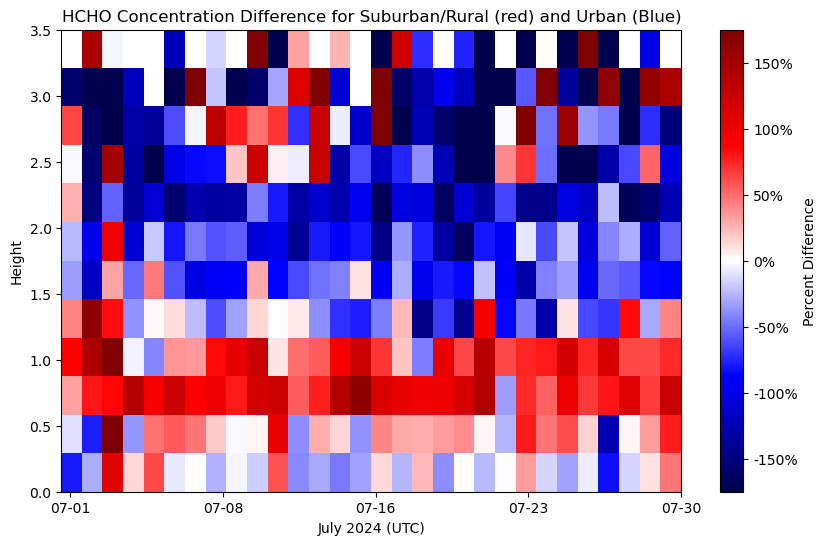

In [21]:
with np.errstate(divide='ignore', invalid='ignore'):
    percent_diff = (pos_statistic - neg_statistic) / ((pos_statistic + neg_statistic) / 2) * 100
    percent_diff[np.isnan(percent_diff)] = np.nan  # Optionally handle NaNs as zeros or 

# Creates Figure and plot
fig, ax = plt.subplots(figsize=(10, 6))

edge = 175 #% value you want to be min and max
c = ax.imshow((percent_diff).T, aspect='auto', cmap='seismic',
              extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
              origin='lower', vmin = -1*edge, vmax = edge)

# Sets words on plot
ax.set_title("HCHO Concentration Difference for Suburban/Rural (red) and Urban (Blue)")
ax.set_xlabel("July 2024 (UTC)")
ax.set_ylabel("Height")

# Color bar settings
cbar = fig.colorbar(c, label="Percent Difference")
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}%')) # adds % sign

# Make ticks readable to Humans
ax.set_xticks(np.linspace(np.nanmin(pos_time), np.nanmax(pos_time), 5))
ax.set_xticklabels(pd.to_datetime(np.linspace(np.nanmin(pos_time), np.nanmax(pos_time), 5) * 86400 + 946684800, unit="s", utc=True).strftime('%m-%d'))


plt.show()
#line to save figure. Must comment out plt.show() if above the savefig line or else fig won't save right
#plt.savefig('Plots/NO2_Diff_Profile_July2024_LaRC_HU.jpg', dpi=300, bbox_inches='tight')